<a href="https://colab.research.google.com/github/jsstar522/hunkim_ML/blob/master/04_CNN/02_CNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Basic example

## Filter를 거친 후의 이미지

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


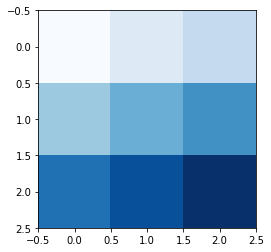

In [16]:
sess = tf.InteractiveSession()
## 최초 이미지 3x3 (input)
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Blues')

shape은 (1, 3, 3, 1)이 나오고 3x3의 한가지 색을 가진 이미지가 1개 있다는 의미입니다. 이제 (2, 2)의 하나의 색을 가진 filter 1개로 위 이미지를 filtering 해보겠습니다.

(2, 2, 1, 1)
conv2d_img shape:  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


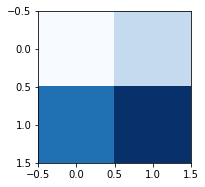

In [24]:
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print(weight.shape)
## 2x2의 이미지, 1개의 색, number of filter

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img shape: ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2, 2), cmap='Blues')

필터를 통과한 이미지는 12, 16, 24, 28의 값을 갖는 2x2의 이미지입니다.

## Padding

이미지가 작아지면서 잃어버리는 정보를 막기 위해 padding을 사용하겠습니다. padding은 기본 이미지에 테두리를 둘러서 output 이미지를 크게 만드는 방법인데, padding="SAME" 조건을 주면 간단하게 input image와 output image의 크기를 맞출 수 있습니다.

(2, 2, 1, 1)
conv2d_img shape:  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


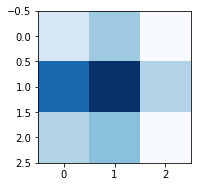

In [25]:
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print(weight.shape)
## 2x2의 이미지, 1개의 색, number of filter

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img shape: ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='Blues')

이제 filter가 하나가 아닌 여러개를 사용해보겠습니다.

(2, 2, 1, 3)
conv2d_img shape:  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


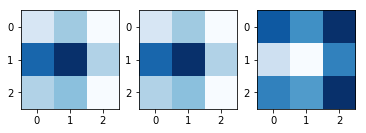

In [28]:
weight = tf.constant([[[[1., 10., -1]], [[1., 10., -1]]],
                      [[[1., 10., -1]], [[1., 10., -1]]]])
print(weight.shape)
## 2x2의 이미지, 1개의 색, number of filter

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img shape: ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3, 3), cmap='Blues')

## Max Pooling

이미지에서 filter 범위 내에 가장 의미있는 값을 뽑아내는 Max pooling 방법을 사용해보겠습니다.

In [29]:
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype=np.float32)

pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


4, 3, 2, 1 의 값을 가진 2x2의 이미지에 padding을 적용하고 2x2 filter 1개로 filtering 하면서 filter 범위에서 가장 큰 값을 뽑아낸 결과는  4, 3, 2, 1로 똑같이 나오게 됩니다.

## MNIST

이제 MNIST 데이터에서 Conv을 적용시켜보겠습니다.

Extracting MNIST_dta/train-images-idx3-ubyte.gz
Extracting MNIST_dta/train-labels-idx1-ubyte.gz
Extracting MNIST_dta/t10k-images-idx3-ubyte.gz
Extracting MNIST_dta/t10k-labels-idx1-ubyte.gz


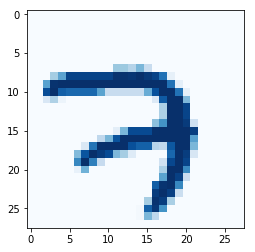

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_dta/", one_hot=True)

img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='Blues')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_10:0", shape=(1, 14, 14, 5), dtype=float32)


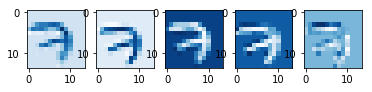

In [36]:
sess = tf.InteractiveSession()

## -1개의 이미지 = 개수에 신경쓰지 않는다
img = img.reshape( -1, 28, 28, 1)
## 5개의 filter
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding="SAME")
print(conv2d)

## 필터링된 이미지
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='Blues')


Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


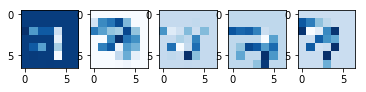

In [38]:
## Max pooling

pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='Blues')